Epoch 1/20
750/750 [==============================] - 16s 6ms/step - loss: 2.0127 - accuracy: 0.2679 - val_loss: 1.6578 - val_accuracy: 0.4251
Epoch 2/20
750/750 [==============================] - 5s 6ms/step - loss: 1.5352 - accuracy: 0.4702 - val_loss: 1.4439 - val_accuracy: 0.5008
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 1.3955 - accuracy: 0.5188 - val_loss: 1.3492 - val_accuracy: 0.5366
Epoch 4/20
750/750 [==============================] - 4s 5ms/step - loss: 1.3228 - accuracy: 0.5464 - val_loss: 1.2970 - val_accuracy: 0.5528
Epoch 5/20
750/750 [==============================] - 5s 7ms/step - loss: 1.2621 - accuracy: 0.5694 - val_loss: 1.2404 - val_accuracy: 0.5756
Epoch 6/20
750/750 [==============================] - 4s 6ms/step - loss: 1.2099 - accuracy: 0.5860 - val_loss: 1.2031 - val_accuracy: 0.5900
Epoch 7/20
750/750 [==============================] - 4s 6ms/step - loss: 1.1659 - accuracy: 0.6004 - val_loss: 1.1722 - val_accuracy: 0.6008
Epoch

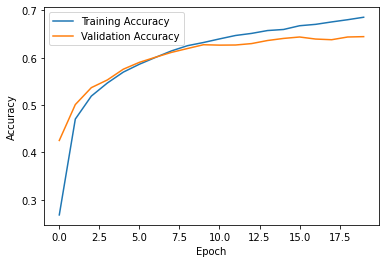

In [6]:
import tensorflow as tf
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import os

#I have pretrained a model using CNN layers on mnist normal dataset, and loading that model below
#Load pre trained model
pretrained_model = tf.keras.models.load_model("mnist_basic.keras")

# Load the training images and labels
train_images = pickle.load(open("636_project1_train_images", "rb"))
train_labels = pickle.load(open("636_project1_train_labels", "rb"))


# Normalize the pixel values of the images to be between 0 and 1
train_images = np.array(train_images)
train_labels = np.array(train_labels)

train_images = train_images.reshape((len(train_images), 28 * 28))
train_images = train_images.astype("float32") / 255

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

#using CNN architecture
input_layer = tf.keras.layers.Input(shape=(28, 28, 1))
x = data_augmentation(input_layer)
x = pretrained_model
x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(input_layer)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
output_layer = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint("final_model.keras",
                                    save_best_only=True)
]

# Reshaping the images to have a depth of 1 (grayscale)
train_images = np.reshape(train_images, (train_images.shape[0], 28, 28, 1))

# Training the model on the noisy images
history = model.fit(train_images, train_labels, epochs=20, callbacks=callbacks, batch_size=64, validation_split=0.2)

# Plot the training and validation accuracy over the epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
